# Time series project
Chahinaze Allal, Kenza Zyadi, Thi Huyen NGuyen, Sarah Falcon, Ana Elisa OLea, Lena Guiot

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import rcParams
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
rcParams['figure.figsize']= 20,7

In [2]:
df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.head()

,dt,AverageTemperature,Country
0,1/1/1900,-10.736,China
1,2/1/1900,-6.315,China
2,3/1/1900,0.754,China
3,4/1/1900,7.569,China
4,5/1/1900,13.470,China


In [4]:
#Delete the columns we don't need 
df = df.drop("AverageTemperatureUncertainty", axis=1)
df.head()

,dt,AverageTemperature,Country
0,1/1/1900,-10.736,China
1,2/1/1900,-6.315,China
2,3/1/1900,0.754,China
3,4/1/1900,7.569,China
4,5/1/1900,13.470,China


In [5]:
df = df.drop("Country", axis=1)
df.head()

,dt,AverageTemperature
0,1/1/1900,-10.736
1,2/1/1900,-6.315
2,3/1/1900,0.754
3,4/1/1900,7.569
4,5/1/1900,13.470


In [6]:
#Convert Month into Datetime
df['dt']=pd.to_datetime(df['dt'])
df.tail()

,dt,AverageTemperature
4090,2013-05-01,6.471
4091,2013-06-01,9.828
4092,2013-07-01,11.838
4093,2013-08-01,11.024
4094,2013-09-01,NaN


In [7]:
#Set the column "month" as the index
df.set_index('dt',inplace=True)
df.head()

,AverageTemperature
dt,
1900-01-01,-10.736
1900-02-01,-6.315
1900-03-01,0.754
1900-04-01,7.569
1900-05-01,13.470


In [8]:
#Divide the data by country by 10 years and total 
China=df[1245:1365]
China_total = df[0:1365]
Mexico=df[2610:2730]
Mexico_total = df[1366:2730]
Norway=df[3974:4094]
Norway_total = df[2731:4094]
China.head()

,AverageTemperature
dt,
2003-10-01,8.142
2003-11-01,0.534
2003-12-01,-5.570
2004-01-01,-7.354
2004-02-01,-2.744


## Cleaning the data

In [9]:
#Missing values 
China.isnull().sum()

AverageTemperature    1
dtype: int64

In [10]:
China = China.fillna(China.mean())
China.isnull().sum()

AverageTemperature    0
dtype: int64

In [11]:
China_total = China_total.fillna(China_total.mean())
China_total.isnull().sum()

AverageTemperature    0
dtype: int64

In [12]:
Mexico.isnull().sum()

AverageTemperature    0
dtype: int64

In [13]:
Norway.isnull().sum()

AverageTemperature    0
dtype: int64

In [14]:
Norway = Norway.fillna(Norway.mean())
Norway.isnull().sum()

AverageTemperature    0
dtype: int64

## Data visualization for 10 years

<AxesSubplot:xlabel='dt'>

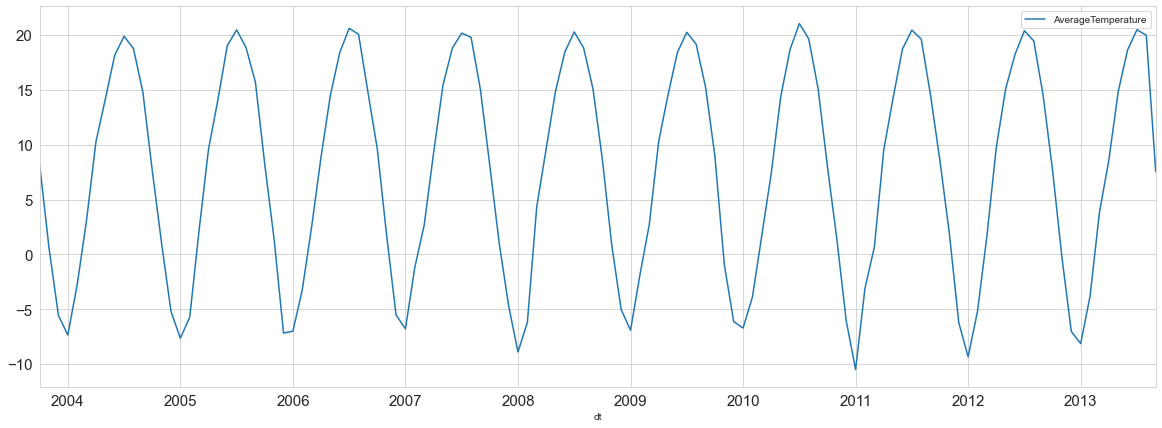

In [15]:
#Data visualization
China.plot()

<AxesSubplot:xlabel='dt'>

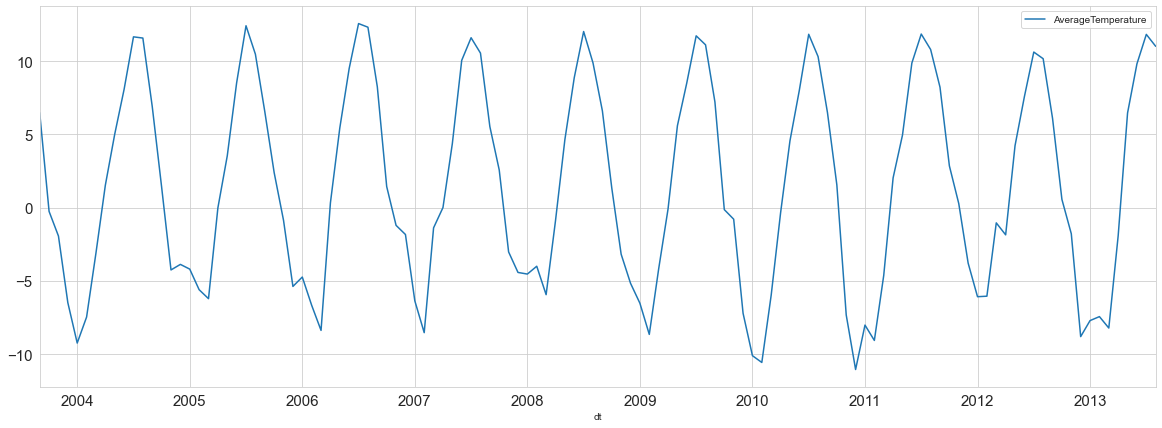

In [16]:
Norway.plot()

## Decomposing the data 

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


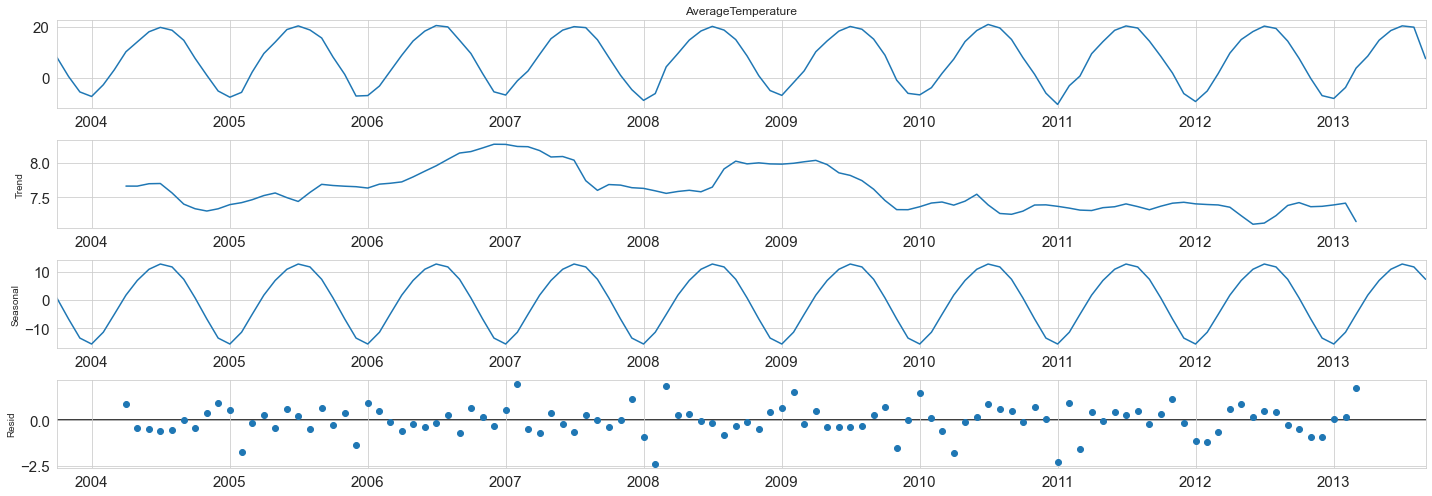

In [18]:
#china 10 years
decompose_result = seasonal_decompose(China['AverageTemperature'],model='additive')
decompose_result.plot();

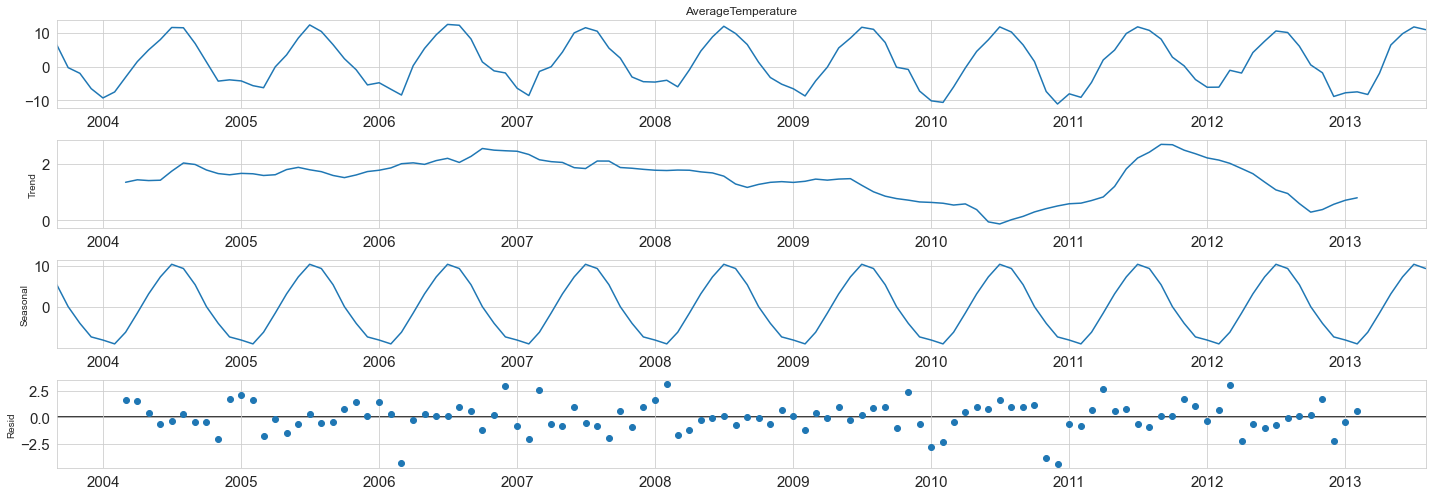

In [19]:
decompose_result = seasonal_decompose(Norway['AverageTemperature'],model='additive')
decompose_result.plot();

In [20]:
#ADF test 
from statsmodels.tsa.stattools import adfuller
# null hypotheisis Ho: It is non stationary
# alternate hypothesis H1: It is stationary
# if result < 0.05 then reject null hypothesis 

def adfuller_test(AverageTemperature):
    result=adfuller(AverageTemperature)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

## Ad fuller test

In [21]:
adfuller_test(China['AverageTemperature'])

ADF Test Statistic : -0.912902159774135
p-value : 0.7836938625631947
#Lags Used : 12
Number of Observations Used : 107
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
adfuller_test(Norway['AverageTemperature'])

ADF Test Statistic : -2.2076847518068634
p-value : 0.20346816757863134
#Lags Used : 10
Number of Observations Used : 109
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [23]:
#Differencing 

China1 = China[['AverageTemperature']] - China[['AverageTemperature']].shift(1)
China1.head()

,AverageTemperature
dt,
2003-10-01,NaN
2003-11-01,-7.608
2003-12-01,-6.104
2004-01-01,-1.784
2004-02-01,4.610


In [24]:
China1['AverageTemperature'].shift(1)

dt
2003-10-01      NaN
2003-11-01      NaN
2003-12-01   -7.608
2004-01-01   -6.104
2004-02-01   -1.784
              ...  
2013-05-01    4.758
2013-06-01    6.247
2013-07-01    3.812
2013-08-01    1.846
2013-09-01   -0.511
Name: AverageTemperature, Length: 120, dtype: float64

In [25]:
China1['Seasonal First Difference'] =China[['AverageTemperature']]-China[['AverageTemperature']].shift(12)

In [26]:
China1.head(14)

,AverageTemperature,Seasonal First Difference
dt,,
2003-10-01,NaN,NaN
2003-11-01,-7.608,NaN
2003-12-01,-6.104,NaN
2004-01-01,-1.784,NaN
2004-02-01,4.610,NaN
2004-03-01,5.882,NaN
2004-04-01,7.146,NaN
2004-05-01,3.887,NaN
2004-06-01,3.988,NaN


In [27]:
Norway1 =Norway[['AverageTemperature']]-Norway[['AverageTemperature']].shift(12)
Norway1.head(14)

,AverageTemperature
dt,
2003-09-01,NaN
2003-10-01,NaN
2003-11-01,NaN
2003-12-01,NaN
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,NaN
2004-05-01,NaN


# we chose to shift it by 12 so 1 year. We compare a year with the previous one.

## Dickey fuller test

In [28]:
## Again test dickey fuller test
adfuller_test(China1['AverageTemperature'].dropna())

ADF Test Statistic : -8.607901447546666
p-value : 6.595731235712614e-14
#Lags Used : 11
Number of Observations Used : 107
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [29]:
## Again test dickey fuller test
adfuller_test(Norway1['AverageTemperature'].dropna())

ADF Test Statistic : -5.019562872363905
p-value : 2.029741603348356e-05
#Lags Used : 11
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

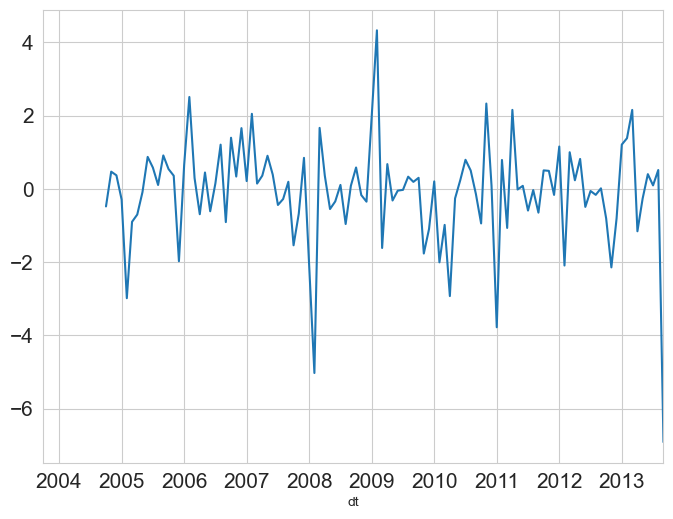

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
China1['Seasonal First Difference'].plot()


# here we see the stationnarity of our data 

<AxesSubplot:xlabel='dt'>

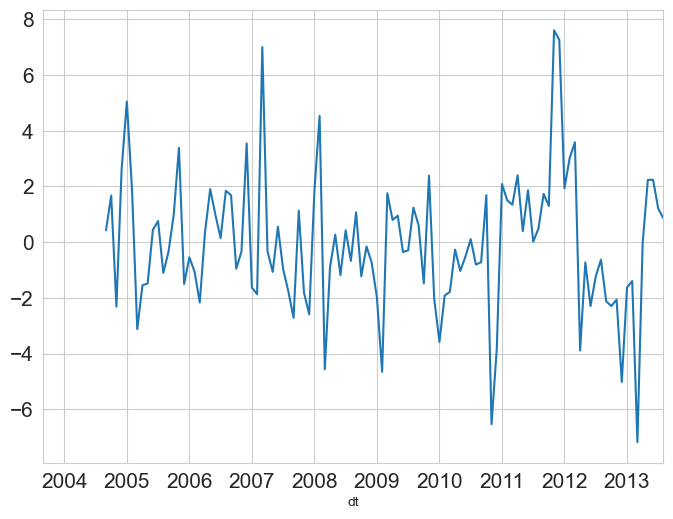

In [31]:
figure(figsize=(8, 6), dpi=100)
Norway1['AverageTemperature'].plot()

In [32]:
Norway1['AverageTemperature'].mean()

-0.05499074074074072

In [33]:
China1['Seasonal First Difference'].mean()

-0.09134718331777156

## plotting acf and pacf

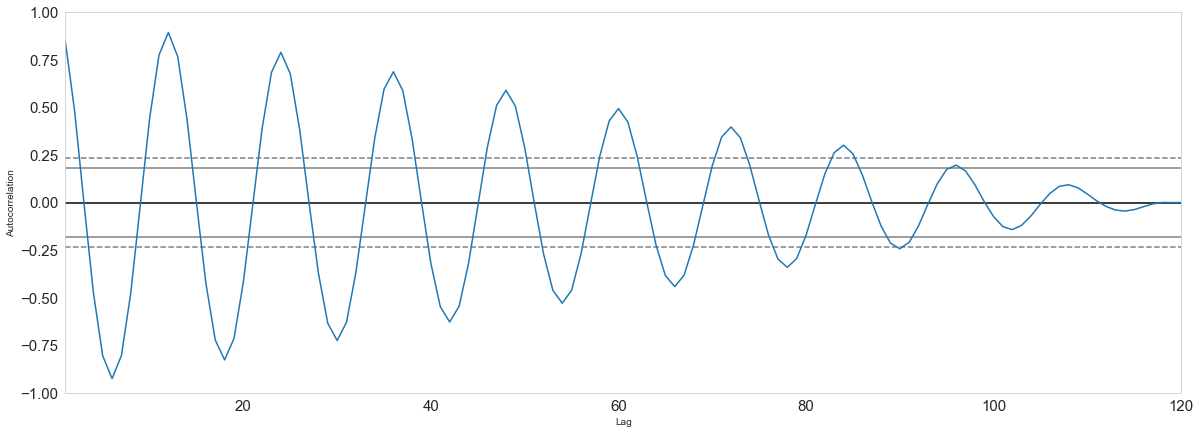

In [34]:
# from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(China['AverageTemperature'])
plt.show()

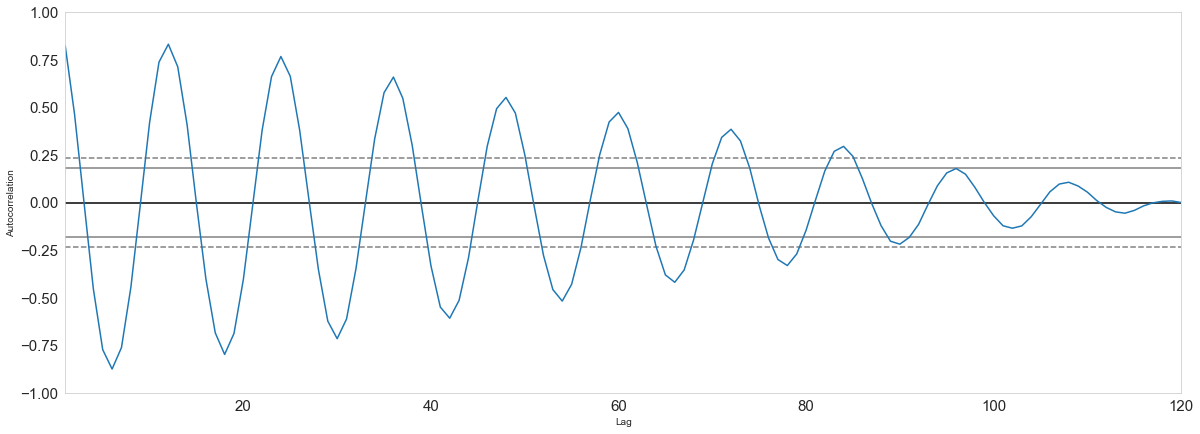

In [35]:
# from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Norway['AverageTemperature'])
plt.show()

# 120 months will not be correlated with t0 (present value)

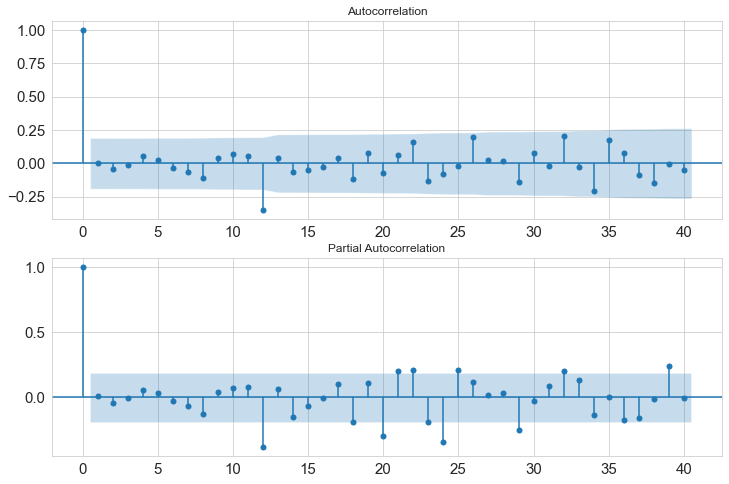

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(China1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(China1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


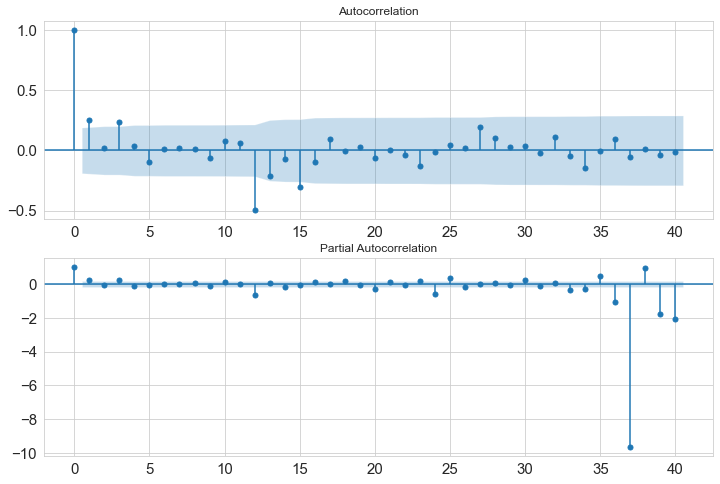

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Norway1['AverageTemperature'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Norway1['AverageTemperature'].iloc[13:],lags=40,ax=ax2)

## ARIMA SARIMAX

In [38]:
# For non-seasonal data
#p=1, d=1, q=1
from statsmodels.tsa.arima_model import ARIMA

In [39]:
China1.head(20)

,AverageTemperature,Seasonal First Difference
dt,,
2003-10-01,NaN,NaN
2003-11-01,-7.608,NaN
2003-12-01,-6.104,NaN
2004-01-01,-1.784,NaN
2004-02-01,4.610,NaN
2004-03-01,5.882,NaN
2004-04-01,7.146,NaN
2004-05-01,3.887,NaN
2004-06-01,3.988,NaN


In [40]:
model=ARIMA(China1['Seasonal First Difference'].iloc[13:],order=(1,1,1))
model_fit=model.fit()

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will b

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                  
=======================================================================================
Dep. Variable:     D.Seasonal First Difference   No. Observations:                  106
Model:                          ARIMA(1, 1, 1)   Log Likelihood                -190.765
Method:                                css-mle   S.D. of innovations              1.432
Date:                         Mon, 06 Dec 2021   AIC                            389.529
Time:                                 13:27:10   BIC                            400.183
Sample:                             12-01-2004   HQIC                           393.847
                                  - 09-01-2013                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0046      0.005     -0.996      0.319      -0.014       0.004
ar.L1.D.Seasonal First Difference     0.0167      0.109      0.153      0.879      -0.197       0.231
ma.L1.D.Seasonal First Difference    -1.0000      0.026    -38.423      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           59.9762           +0.0000j           59.9762            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='dt'>

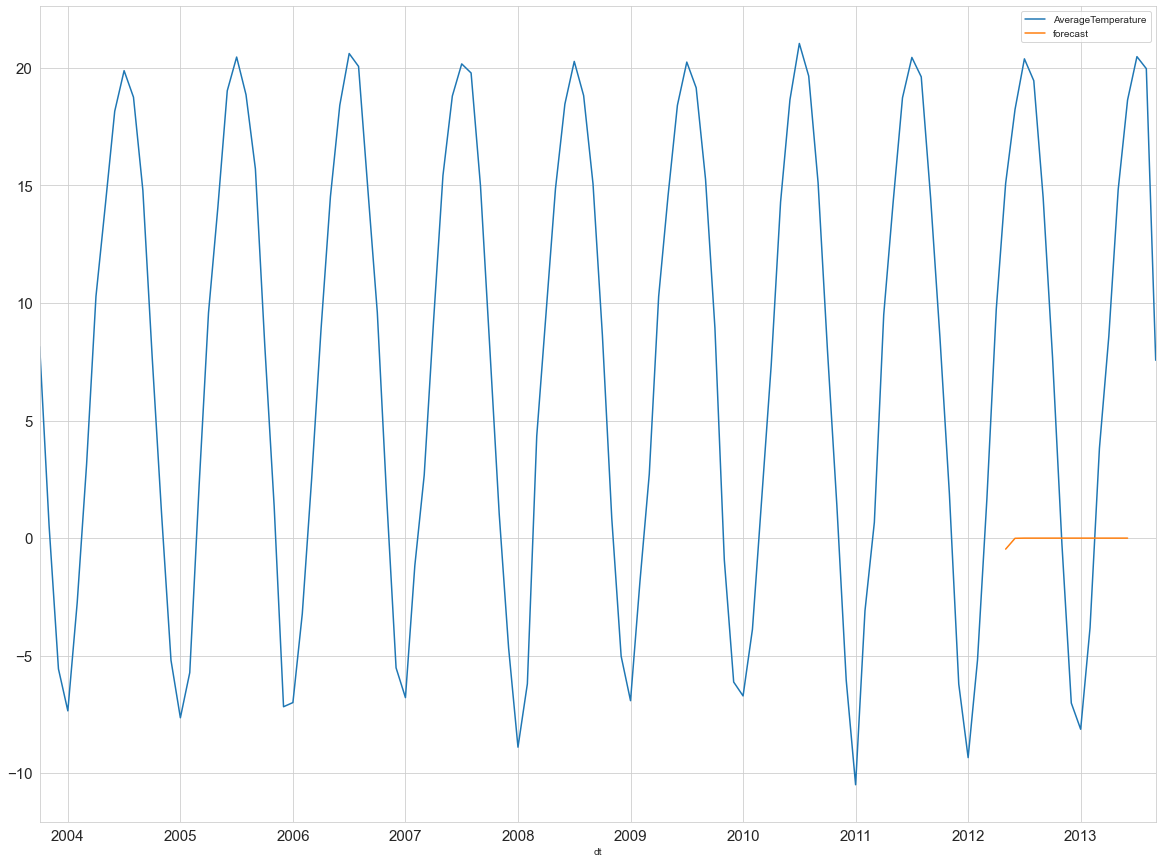

In [42]:
China['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
China[['AverageTemperature','forecast']].plot(figsize=(20,15))

In [45]:
model = sm.tsa.statespace.SARIMAX(China['AverageTemperature'], order = (2,1,1), seasonal_order = (2,1,1,12))
results = model.fit()

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='dt'>

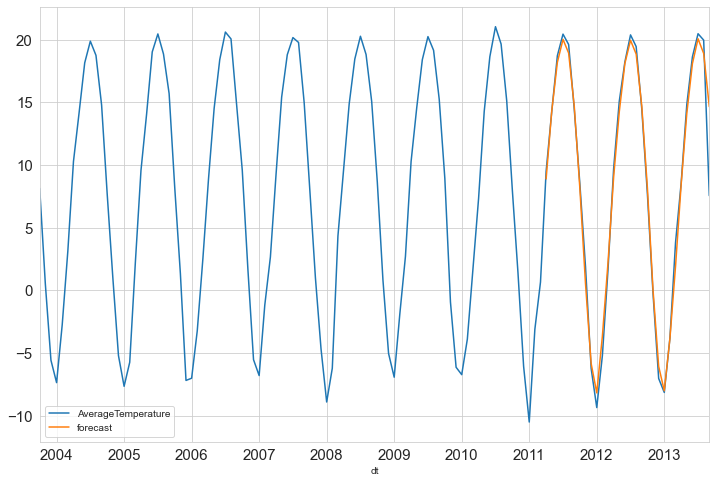

In [47]:
China['forecast'] = results.predict(start = 90, end= 119, dynamic = True)
China[['AverageTemperature', 'forecast']].plot(figsize= (12,8))

In [48]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months = x) for x in range(0,12)]

In [49]:
future_dates_china = pd.DataFrame(index=future_dates[1:],columns=China.columns)

In [50]:
future_dates_china.tail()

,AverageTemperature,forecast
2014-04-01,NaN,NaN
2014-05-01,NaN,NaN
2014-06-01,NaN,NaN
2014-07-01,NaN,NaN
2014-08-01,NaN,NaN


In [51]:
future_china=pd.concat([China,future_dates_china])

<AxesSubplot:>

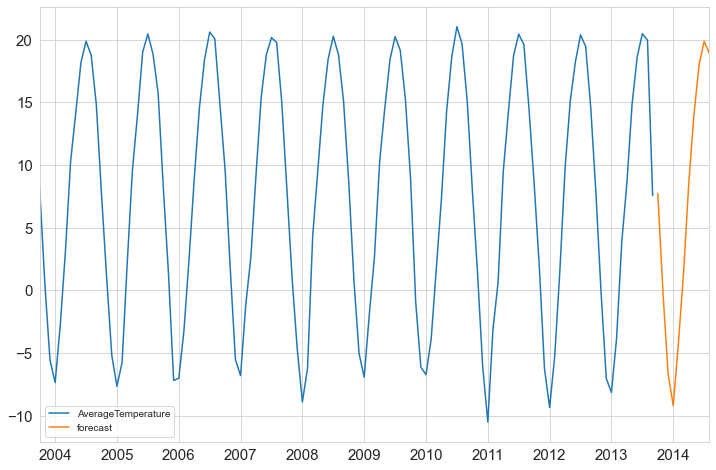

In [52]:
future_china['forecast'] = results.predict(start = 120, end =200 , dynamic= True)  
future_china[['AverageTemperature', 'forecast']].plot(figsize=(12, 8))

In [53]:
adfuller_test(Norway1['AverageTemperature'].dropna())

ADF Test Statistic : -5.019562872363905
p-value : 2.029741603348356e-05
#Lags Used : 11
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='dt'>

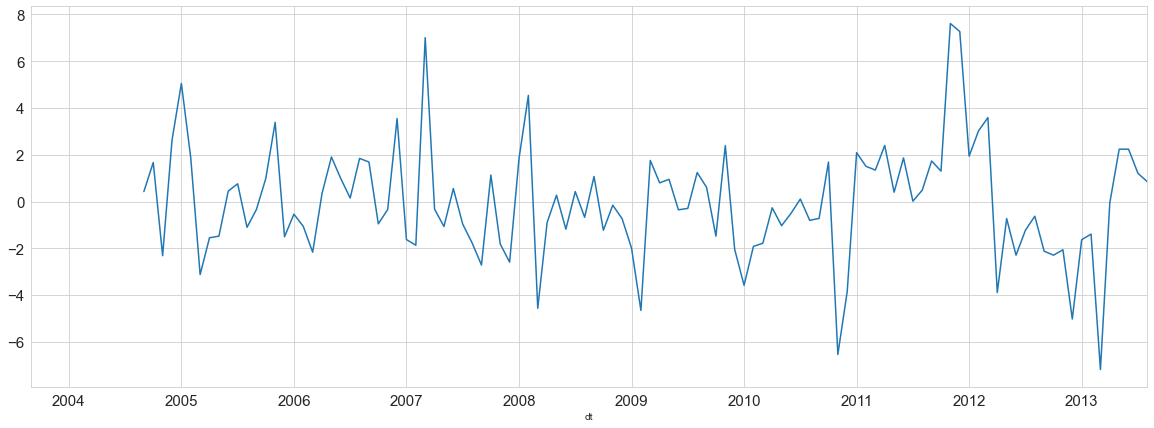

In [54]:
Norway1['AverageTemperature'].plot()


In [55]:
model=ARIMA(Norway1[12:],order=(1,1,1))
model_fitN=model.fit()

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will b

In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARIMA Model Results                                  
=======================================================================================
Dep. Variable:     D.Seasonal First Difference   No. Observations:                  106
Model:                          ARIMA(1, 1, 1)   Log Likelihood                -190.765
Method:                                css-mle   S.D. of innovations              1.432
Date:                         Mon, 06 Dec 2021   AIC                            389.529
Time:                                 13:28:52   BIC                            400.183
Sample:                             12-01-2004   HQIC                           393.847
                                  - 09-01-2013                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0046      0.005     -0.996      0.319      -0.014       0.004
ar.L1.D.Seasonal First Difference     0.0167      0.109      0.153      0.879      -0.197       0.231
ma.L1.D.Seasonal First Difference    -1.0000      0.026    -38.423      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           59.9762           +0.0000j           59.9762            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='dt'>

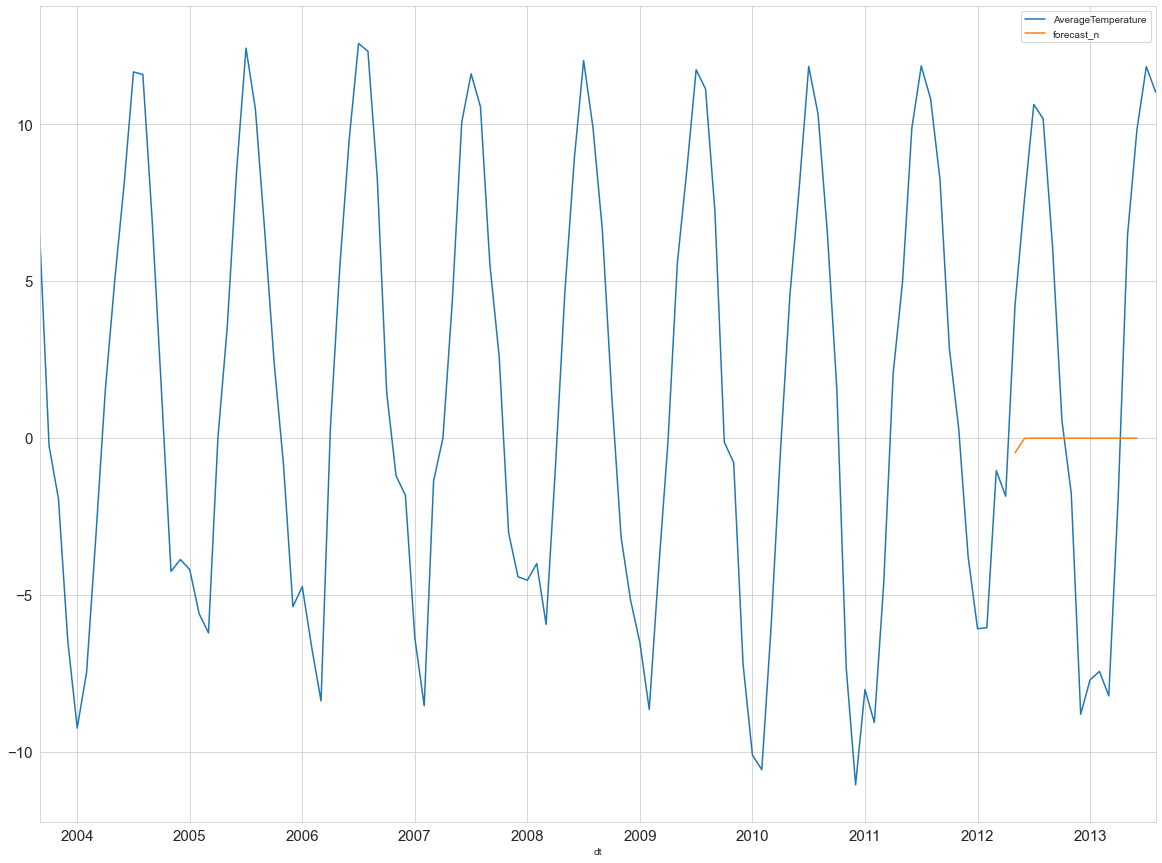

In [57]:
Norway['forecast_n']=model_fit.predict(start=90,end=103,dynamic=True)
Norway[['AverageTemperature','forecast_n']].plot(figsize=(20,15))

In [65]:
model_norway = sm.tsa.statespace.SARIMAX(Norway['AverageTemperature'], order = (2,1,1), seasonal_order = (2,1,1,12))
results1_norway = model.fit()

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
w

<AxesSubplot:xlabel='dt'>

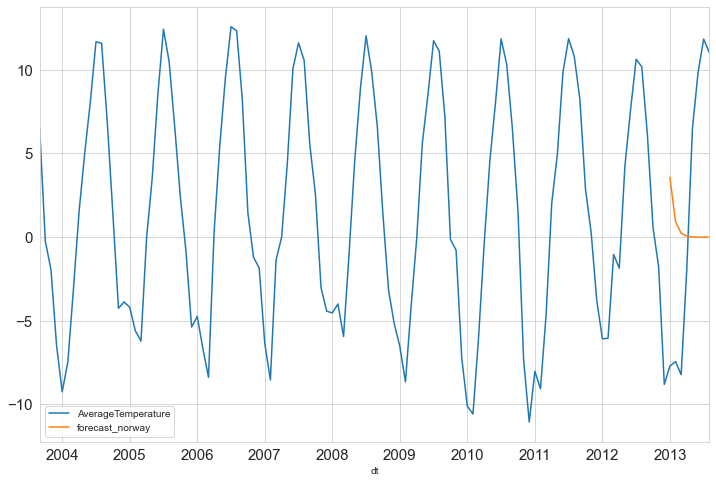

In [66]:
Norway['forecast_norway'] = results1_norway.predict(start = 100, end= 150, dynamic = True)
Norway[['AverageTemperature', 'forecast_norway']].plot(figsize= (12,8))

In [339]:
norway_true = Norway[['AverageTemperature']].tail(20)

In [338]:
norway_pred = Norway[['forecast_norway']].tail(20)

In [341]:
from sklearn.metrics import mean_squared_error
mean_squared_error(norway_true, norway_pred, squared=False)

1.5649582695825204

In [342]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [364]:
m = 12 #time period
alpha=0.9

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'AverageTemperature simple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='dt'>

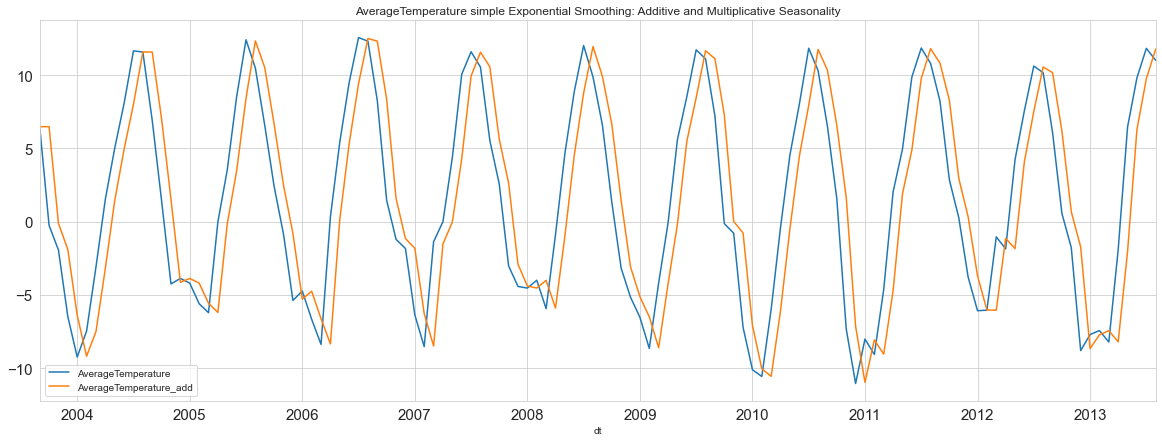

In [365]:
Norway['AverageTemperature_add'] = SimpleExpSmoothing(Norway['AverageTemperature']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues

Norway[['AverageTemperature','AverageTemperature_add']].plot(title='AverageTemperature simple Exponential Smoothing: Additive and Multiplicative Seasonality')

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'AverageTemperature double Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='dt'>

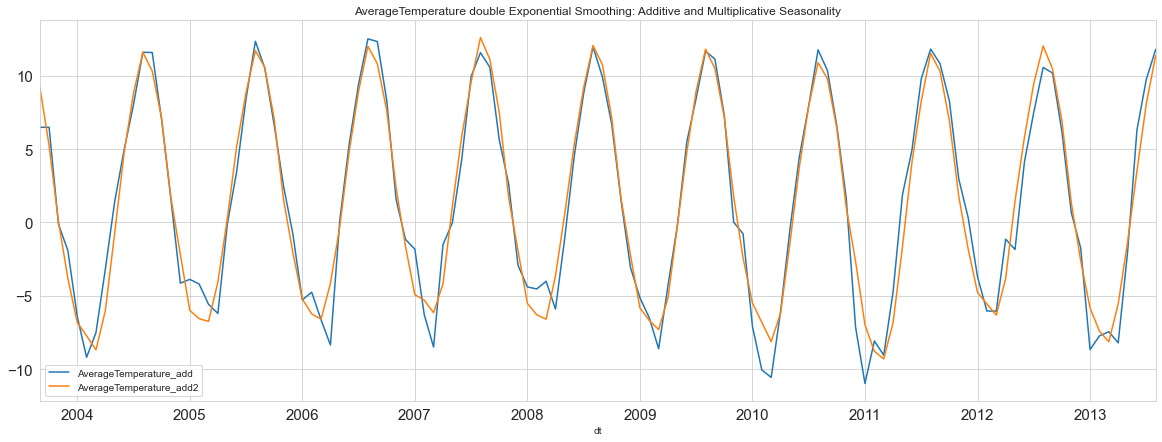

In [366]:
Norway['AverageTemperature_add2'] = ExponentialSmoothing(Norway['AverageTemperature_add'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

Norway[['AverageTemperature_add','AverageTemperature_add2']].plot(title='AverageTemperature double Exponential Smoothing: Additive and Multiplicative Seasonality')

C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Lena\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'AverageTemperature Triple Exponential Smoothing: Additive and Multiplicative Seasonality'}, xlabel='dt'>

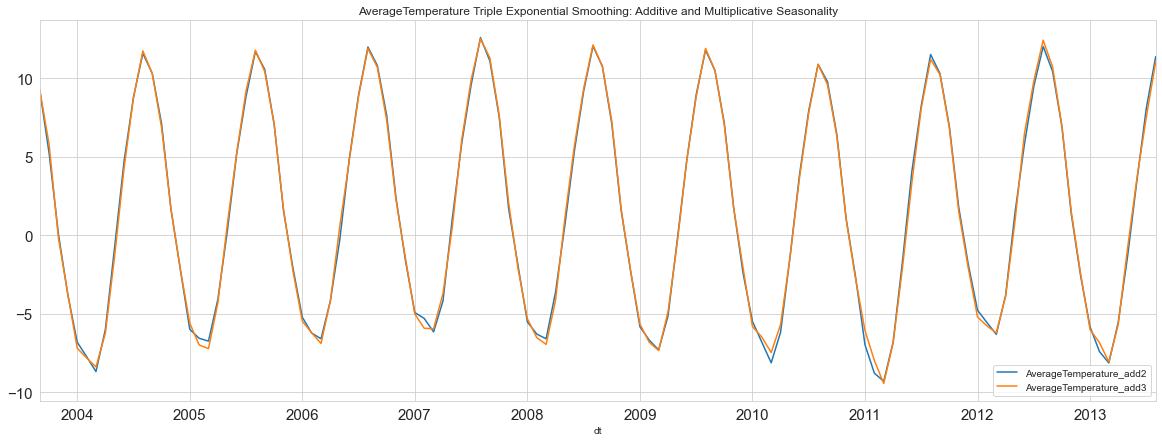

In [367]:
Norway['AverageTemperature_add3'] = ExponentialSmoothing(Norway['AverageTemperature_add2'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

Norway[['AverageTemperature_add2','AverageTemperature_add3']].plot(title='AverageTemperature Triple Exponential Smoothing: Additive and Multiplicative Seasonality')

In [368]:
mean_squared_error(Norway['AverageTemperature'], Norway['AverageTemperature_add3'], squared=False)

3.949152398088781

In [325]:
future_dates_n = [df.index[-1]+DateOffset(months = x) for x in range(0,12)]

In [326]:
future_dates_norway = pd.DataFrame(index=future_dates_n[0:],columns=Norway.columns)

In [327]:
future_dates_norway.tail()

,AverageTemperature,forecast_n,forecast_norway
2014-04-01,NaN,NaN,NaN
2014-05-01,NaN,NaN,NaN
2014-06-01,NaN,NaN,NaN
2014-07-01,NaN,NaN,NaN
2014-08-01,NaN,NaN,NaN


In [328]:
future_norway=pd.concat([Norway,future_dates_norway])

In [68]:
future_norway['forecast_norway'] = results1_norway.predict(start = 119, end =200 , dynamic= True)  
future_norway[['AverageTemperature', 'forecast_norway']].plot(figsize=(12, 8))

ValueError: could not broadcast input array from shape (0,) into shape (1,)

In [ ]:
## we did sarima and a triple exponential smoothing with various parameters and found that sarima gave us the best accuracy because it has the 
smallest mean squared error so we choose this to forecast 

In [ ]:
we were surprised because we thought that there was going to be a trend due to pollution and climate change but it is too subtle to clearly be seen